<a href="https://colab.research.google.com/github/Harshitha1588/ADM-2025/blob/main/ADM_Week_4_1588.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outlier Detection

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [29]:
np.random.seed(42)
data=np.random.normal(0,1,1000) #Normal distribution
outliers=np.random.uniform(5,10,5) #Artificial outliers
data=np.concatenate([data,outliers])


In [30]:
df=pd.DataFrame(data,columns=['Value'])

#Detecting outliers using IQR method


In [31]:
Q1=df['Value'].quantile(0.25)
Q3=df['Value'].quantile(0.75)
IQR=Q3-Q1
lb=Q1-1.5*IQR
Ub=Q3-1.5*IQR

In [32]:
outliers=df[(df['Value']<lb) | (df['Value']>Ub)]

Detect outliers using Z-Score method

In [33]:
Z_Score=stats.zscore(df)
outliers_zscore=df[np.abs(Z_Score)>3]

Visualizing the outliers using a boxplpot

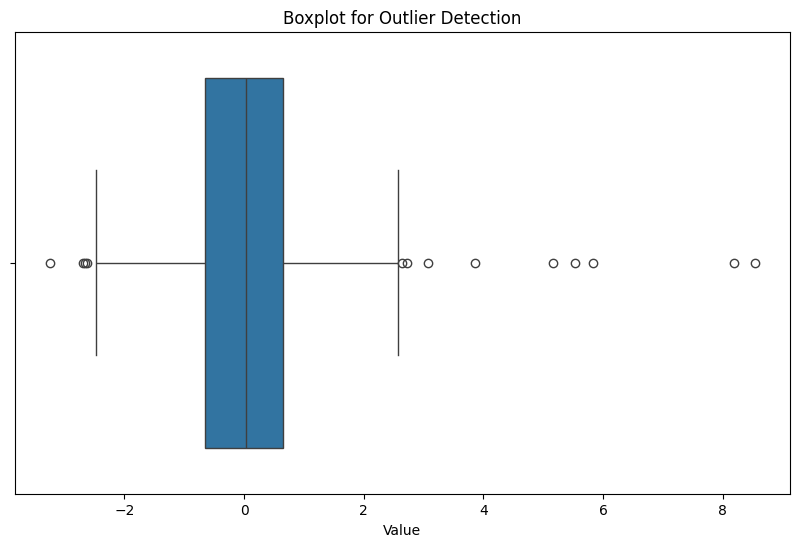

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Value'])
plt.title('Boxplot for Outlier Detection')
plt.show()

Handling Outliers

In [35]:
df_capped=df.copy()
df_capped['Value']=np.clip(df_capped['Value'],lb,Ub)

In [36]:
df_removed=df.copy()
df_removed=df_removed[(df_removed['Value']>=lb)&(df_removed['Value']<=Ub)]

In [37]:
df_imputed=df.copy()
median_value=df['Value'].median()
df_imputed['Value']=np.where((df_imputed['Value']<lb)|(df_imputed['Value']>Ub),median_value,df_imputed['Value'])

Visualization of handled data

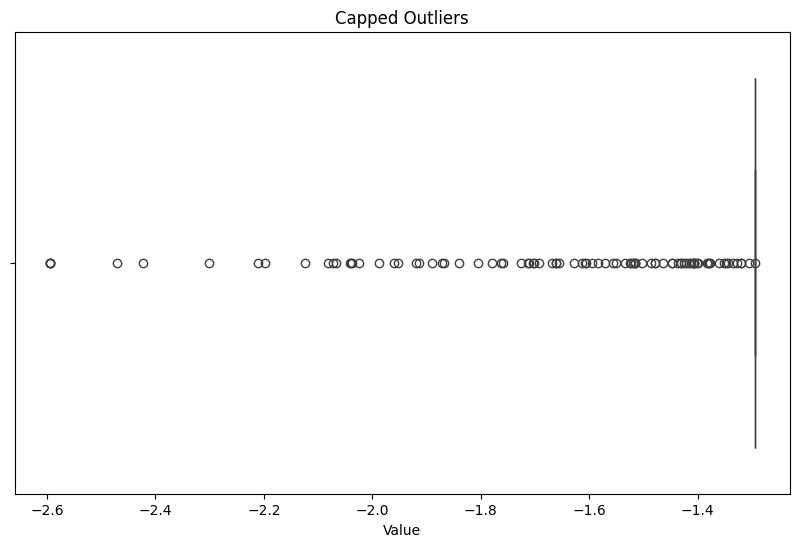

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_capped['Value'])
plt.title('Capped Outliers')
plt.show()

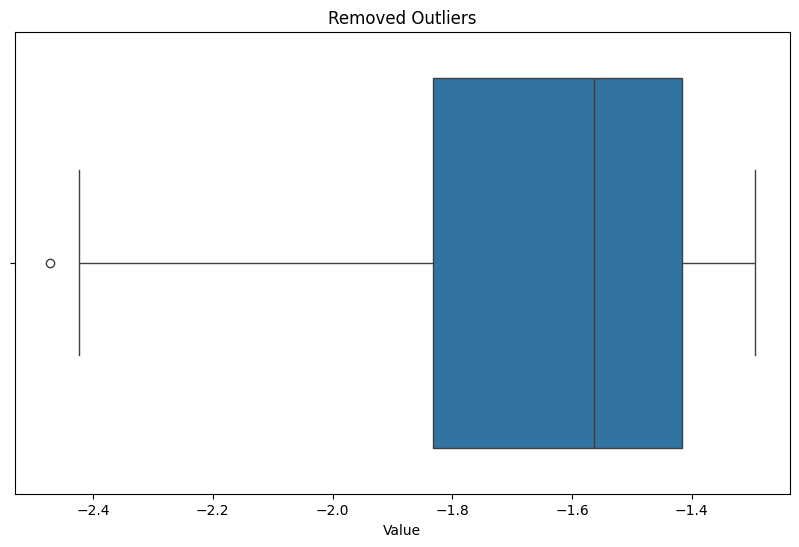

In [39]:
#removed data
plt.figure(figsize=(10,6))
sns.boxplot(x=df_removed['Value'])
plt.title('Removed Outliers')
plt.show()

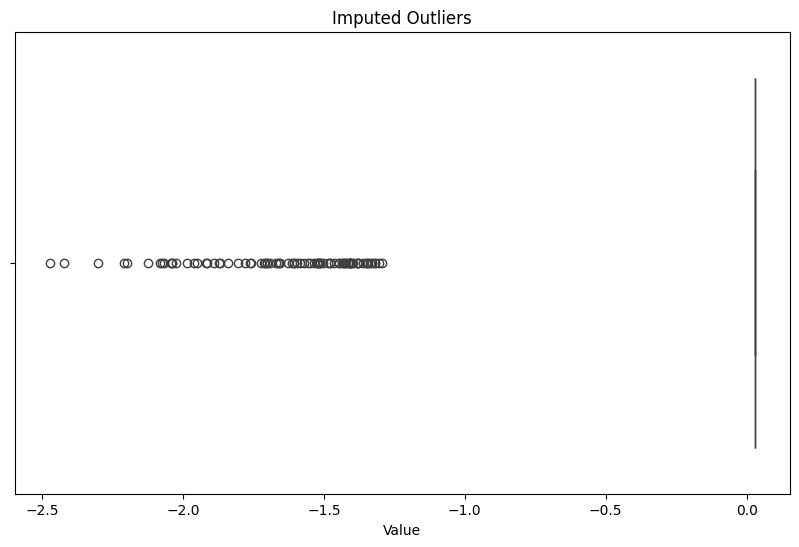

In [40]:
#Imputed data
plt.figure(figsize=(10,6))
sns.boxplot(x=df_imputed['Value'])
plt.title('Imputed Outliers')
plt.show()

In [41]:
print(f'Outliers detected using IQR method:\n{outliers}')
print(f'Outliers detected using Z-Score method:\n{outliers_zscore}')

Outliers detected using IQR method:
         Value
0     0.496714
1    -0.138264
2     0.647689
3     1.523030
4    -0.234153
...        ...
1000  5.837413
1001  5.522839
1002  8.182151
1003  8.532379
1004  5.157931

[919 rows x 1 columns]
Outliers detected using Z-Score method:
         Value
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
...        ...
1000  5.837413
1001  5.522839
1002  8.182151
1003  8.532379
1004  5.157931

[1005 rows x 1 columns]
